In [17]:
## 기본 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 모듈 import
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

## Model 1

In [18]:
# dir(keras.datasets)
# dir(keras.layers)
# dir(keras.losses)

In [19]:
## dataset 정리
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=.2)

In [20]:
print(X_train.shape)
print(y_train.shape)

(48000, 28, 28)
(48000,)


9

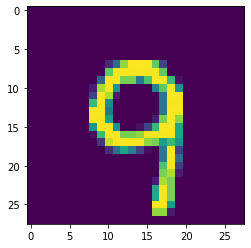

In [21]:
plt.imshow(X_train[0])
y_train[0]

In [22]:
X_train.shape

(48000, 28, 28)

In [23]:
# reshape를 하더라도 데이터 변화는 없다.
x = X_train.reshape(-1,784*1000)

In [24]:
y = x.reshape(48000,28,28)

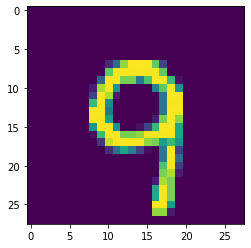

In [25]:
plt.imshow(y[0])

In [26]:
# X 데이터 정리
X_train = X_train.reshape(-1,784)
X_val = X_val.reshape(-1,784)
X_test = X_test.reshape(-1,784)

In [27]:
# y 데이터 확인 및 정리
np.unique(y_train)
np.unique(y_train).size
# categorical 데이터 확인
# one-hot 변환
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [28]:
# np.unique(y_train, return_counts=True)

In [29]:
## 모델 생성
model1 = Sequential()
model1.add(Dense(1024,activation="relu",input_dim=784))
model1.add(Dense(512,activation="sigmoid"))
model1.add(Dense(10,activation="softmax"))

In [30]:
model1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1024)              803840    
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________


In [31]:
## 모델 설정
optimizer = "sgd"
loss = "categorical_crossentropy"
metrics = ["accuracy"]
model1.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics
)

In [32]:
## 모델 학습
model1.fit(
    X_train,
    y_train,
    epochs = 10,
    # batch_size=32,
    validation_data = (X_val,y_val)
)
# batch_size = 32 -> 48000/32 = 1500

Epoch 1/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4195 - accuracy: 0.8894 - val_loss: 0.2567 - val_accuracy: 0.9296
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2060 - accuracy: 0.9429 - val_loss: 0.1961 - val_accuracy: 0.9449
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1547 - accuracy: 0.9552 - val_loss: 0.1595 - val_accuracy: 0.9545
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1236 - accuracy: 0.9658 - val_loss: 0.1411 - val_accuracy: 0.9603
Epoch 5/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0987 - accuracy: 0.9718 - val_loss: 0.1219 - val_accuracy: 0.9645
Epoch 6/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0810 - accuracy: 0.9774 - val_loss: 0.1139 - val_accuracy: 0.9671
Epoch 7/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0689 - accuracy: 0.9812 - val_loss: 0.1087 - val_ac

In [33]:
## test 정확도 검증
model1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0817 - accuracy: 0.9748


[0.08168316632509232, 0.9747999906539917]

In [34]:
# np.sum((np.argmax(model1.predict(X_test),axis=1) == np.argmax(y_test,axis=1))/y_test.size)

In [35]:
np.sum(np.argmax(y_test,axis=1) == np.argmax(model1.predict(X_test),axis=1))/len(y_test)

313/313 [==============================] - 1s 4ms/step


0.9748

In [36]:
## 활용
def mnist_test(x):
    ind = np.random.choice(np.arange(len(X_test)),x, replace=False)
    size = x
    score = 0
    for i in ind:
        plt.imshow(X_test[i].reshape(28,28))
        pred = np.argmax(model1.predict(X_test[[i]]))
        real = np.argmax(y_test[i])
        if pred == real:
            result = "맞음"
            score += 1
        else:
            result = "틀림"
        score = (score/size)*100
        print(f"정답은 ===> {real}  예측은 ===> {pred}  결과는 ===> {result} ")
        plt.show()
    print("\n",f"총 {size}를 예측한 결과 예측률은{score} %")

1/1 [==============================] - 0s 21ms/step
정답은 ===> 6  예측은 ===> 6  결과는 ===> 맞음 


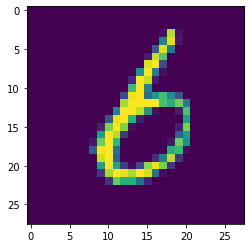

1/1 [==============================] - 0s 18ms/step
정답은 ===> 4  예측은 ===> 4  결과는 ===> 맞음 


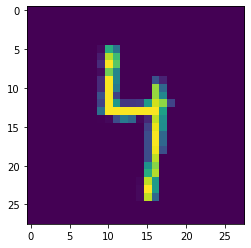

1/1 [==============================] - 0s 17ms/step
정답은 ===> 0  예측은 ===> 0  결과는 ===> 맞음 


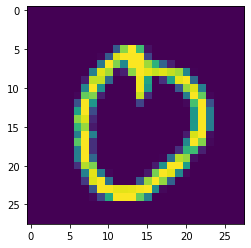

1/1 [==============================] - 0s 17ms/step
정답은 ===> 1  예측은 ===> 1  결과는 ===> 맞음 


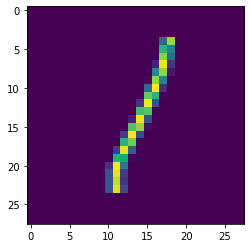

1/1 [==============================] - 0s 19ms/step
정답은 ===> 3  예측은 ===> 3  결과는 ===> 맞음 


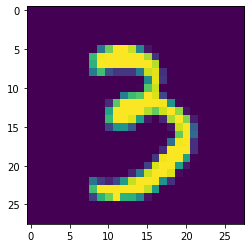

1/1 [==============================] - 0s 18ms/step
정답은 ===> 7  예측은 ===> 7  결과는 ===> 맞음 


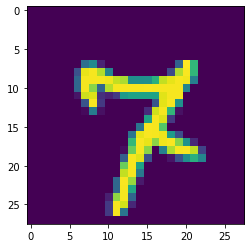

1/1 [==============================] - 0s 16ms/step
정답은 ===> 5  예측은 ===> 5  결과는 ===> 맞음 


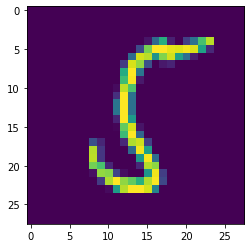

1/1 [==============================] - 0s 18ms/step
정답은 ===> 4  예측은 ===> 4  결과는 ===> 맞음 


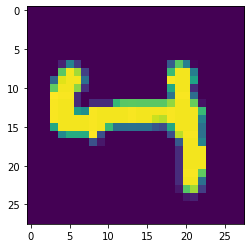

1/1 [==============================] - 0s 17ms/step
정답은 ===> 1  예측은 ===> 1  결과는 ===> 맞음 


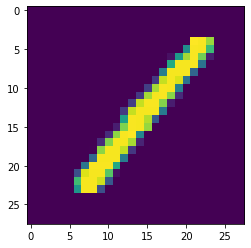

1/1 [==============================] - 0s 17ms/step
정답은 ===> 5  예측은 ===> 5  결과는 ===> 맞음 


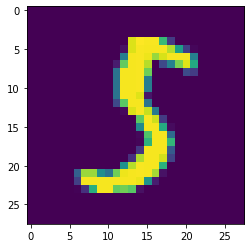


 총 10를 예측한 결과 예측률은11111111110.000002 %


In [37]:
mnist_test(10)

## Model 2

In [38]:
## dataset 정리
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [39]:
y_train_full = np.where((y_train_full == 1) | (y_train_full == 7) | (y_train_full == 9)
                        ,1,0)

In [40]:
y_test = np.where((y_test == 1) | (y_test == 7) | (y_test == 9)
                    ,1,0)

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=.2)

In [42]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(48000, 28, 28)
(12000, 28, 28)
(48000,)
(12000,)


In [43]:
X_train = X_train.reshape(-1,28*28)
X_val = X_val.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [44]:
np.unique(y_train)

array([0, 1])

In [45]:
model2 = Sequential()
model2.add(Dense(1024,activation="relu",input_shape=(784,)))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(512,activation="sigmoid"))
model2.add(keras.layers.Dense(1,activation="sigmoid"))

In [46]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              803840    
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 1)                 513       
                                                                 
Total params: 1,333,249
Trainable params: 1,331,201
Non-trainable params: 2,048
_________________________________________________________________


In [47]:
## 모델 설정
model2.compile(optimizer="sgd",
                loss="binary_crossentropy",
                metrics=["accuracy"])

# model2.compile(optimizer=keras.optimizers.SGD(),
#                 loss=keras.losses.BinaryCrossentropy(),
#                 metrics=["accuracy"])

In [48]:
X_val.shape

(12000, 784)

In [49]:
## 모델 학습
model2.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size=400,
    validation_data = (X_val,y_val),
    verbose=1
)

Epoch 1/10
120/120 [==============================] - 5s 36ms/step - loss: 0.3751 - accuracy: 0.8496 - val_loss: 0.2535 - val_accuracy: 0.8988
Epoch 2/10
120/120 [==============================] - 4s 37ms/step - loss: 0.2149 - accuracy: 0.9346 - val_loss: 0.1871 - val_accuracy: 0.9394
Epoch 3/10
120/120 [==============================] - 4s 35ms/step - loss: 0.1720 - accuracy: 0.9472 - val_loss: 0.1609 - val_accuracy: 0.9481
Epoch 4/10
120/120 [==============================] - 4s 35ms/step - loss: 0.1495 - accuracy: 0.9535 - val_loss: 0.1451 - val_accuracy: 0.9537
Epoch 5/10
120/120 [==============================] - 4s 36ms/step - loss: 0.1350 - accuracy: 0.9575 - val_loss: 0.1333 - val_accuracy: 0.9571
Epoch 6/10
120/120 [==============================] - 4s 35ms/step - loss: 0.1244 - accuracy: 0.9608 - val_loss: 0.1248 - val_accuracy: 0.9602
Epoch 7/10
120/120 [==============================] - 4s 36ms/step - loss: 0.1163 - accuracy: 0.9632 - val_loss: 0.1182 - val_accuracy: 0.9621

In [50]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1025 - accuracy: 0.9683


[0.10251104831695557, 0.9682999849319458]

In [51]:
def mnist_test1(x):
    ind = np.random.choice(np.arange(len(X_test)),x,replace=False)
    size = x
    score = 0
    for i in ind:
        plt.imshow(X_test[i].reshape(28,28))
        pred = np.where(model2.predict(X_test[[i]]) >0.5,1,0)
        real = np.where(y_test[i]>0.5,1,0)
        if pred == real:
            result = '맞음'
            score += 1
        else:
            result = '틀림'
        score = (score/size)*100
        print(f'정답은 ===> {real}  예측은 ===> {pred} 결과는 ===> {result}')
        plt.show()

In [52]:
model2.predict(X_test[0:1])

1/1 [==============================] - 0s 73ms/step


array([[0.98567665]], dtype=float32)

1/1 [==============================] - 0s 18ms/step
정답은 ===> 1  예측은 ===> [[1]] 결과는 ===> 맞음


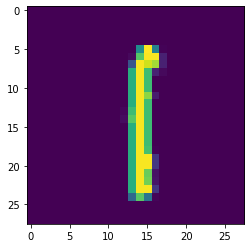

1/1 [==============================] - 0s 19ms/step
정답은 ===> 0  예측은 ===> [[0]] 결과는 ===> 맞음


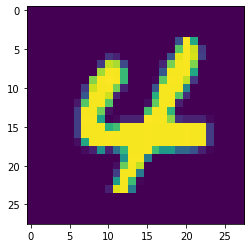

1/1 [==============================] - 0s 19ms/step
정답은 ===> 1  예측은 ===> [[1]] 결과는 ===> 맞음


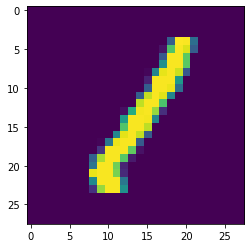

1/1 [==============================] - 0s 19ms/step
정답은 ===> 1  예측은 ===> [[1]] 결과는 ===> 맞음


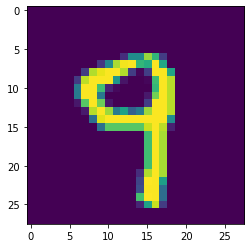

1/1 [==============================] - 0s 18ms/step
정답은 ===> 0  예측은 ===> [[0]] 결과는 ===> 맞음


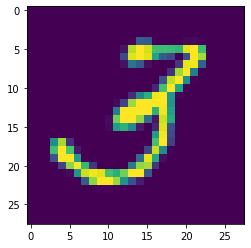

1/1 [==============================] - 0s 17ms/step
정답은 ===> 0  예측은 ===> [[0]] 결과는 ===> 맞음


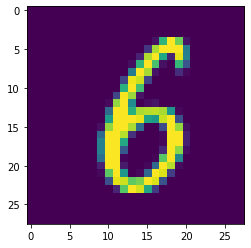

1/1 [==============================] - 0s 17ms/step
정답은 ===> 1  예측은 ===> [[1]] 결과는 ===> 맞음


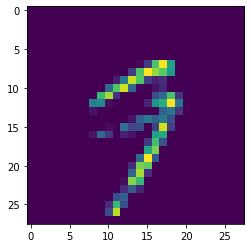

1/1 [==============================] - 0s 17ms/step
정답은 ===> 0  예측은 ===> [[0]] 결과는 ===> 맞음


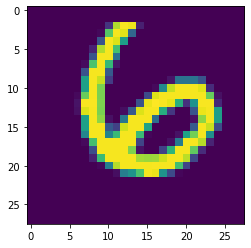

1/1 [==============================] - 0s 18ms/step
정답은 ===> 0  예측은 ===> [[0]] 결과는 ===> 맞음


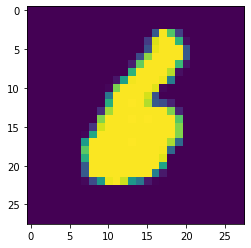

1/1 [==============================] - 0s 17ms/step
정답은 ===> 0  예측은 ===> [[0]] 결과는 ===> 맞음


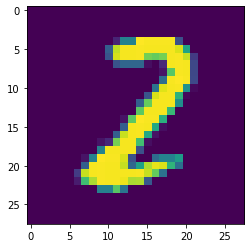

In [53]:
mnist_test1(10)

## Model 3

In [54]:
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import RMSprop
from keras.losses import CategoricalCrossentropy

In [55]:
# 데이터 수집
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [56]:
print(X_train_full.shape)
print(y_train_full.shape)
print(np.unique(y_train_full).size)

(60000, 28, 28)
(60000,)
10


In [57]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [58]:
x1 = X_train.shape[1]
x2 = X_train.shape[2]
X_train = X_train.reshape(-1,x1*x2)
X_val = X_val.reshape(-1,x1*x2)
X_test = X_test.reshape(-1,x1*x2)

In [59]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [60]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]
print(input_shape)
print(output_shape)

(784,)
10


In [61]:
model1 = Sequential()
model1.add(Dense(1024,activation='relu',input_shape=input_shape))
model1.add(Dense(512,activation='relu'))
model1.add(Dense(output_shape,activation='softmax'))

In [62]:
model2 = Sequential(
    [
        Dense(1024,activation='relu',input_shape=input_shape),
        Dense(512,activation='relu'),
        Dense(output_shape,activation='softmax')
    ]
)

In [63]:
input_ = Input(shape=input_shape)
l1 = Dense(1024,activation='relu')(input_)
l2 = Dense(512,activation='relu')(l1)
output_ = Dense(output_shape,activation='softmax')(l2)

model3 = Model(inputs=[input_],outputs=[output_])

In [64]:
optimizer = RMSprop()
loss = CategoricalCrossentropy()
metrics = ['accuracy']

In [65]:
model1.compile(optimizer=optimizer,
              loss =loss,
              metrics=metrics)
model2.compile(optimizer=optimizer,
              loss =loss,
              metrics=metrics)
model3.compile(optimizer=optimizer,
              loss =loss,
              metrics=metrics)

In [66]:
model1.fit(X_train,
          y_train,
          epochs=10,
          batch_size=400,
          validation_data=(X_val,y_val))
model2.fit(X_train,
          y_train,
          epochs=10,
          batch_size=400,
          validation_data=(X_val,y_val))
model3.fit(X_train,
          y_train,
          epochs=10,
          batch_size=400,
          validation_data=(X_val,y_val))
model1_result = model1.evaluate(X_test,y_test)
model2_result = model1.evaluate(X_test,y_test)
model3_result = model1.evaluate(X_test,y_test)

Epoch 1/10
113/113 [==============================] - 5s 38ms/step - loss: 15.6507 - accuracy: 0.8403 - val_loss: 0.8985 - val_accuracy: 0.9051
Epoch 2/10
113/113 [==============================] - 4s 38ms/step - loss: 0.5255 - accuracy: 0.9337 - val_loss: 0.3836 - val_accuracy: 0.9372
Epoch 3/10
113/113 [==============================] - 4s 37ms/step - loss: 0.3021 - accuracy: 0.9514 - val_loss: 0.5030 - val_accuracy: 0.9368
Epoch 4/10
113/113 [==============================] - 4s 38ms/step - loss: 0.2360 - accuracy: 0.9617 - val_loss: 0.4331 - val_accuracy: 0.9385
Epoch 5/10
113/113 [==============================] - 4s 38ms/step - loss: 0.2104 - accuracy: 0.9671 - val_loss: 0.3874 - val_accuracy: 0.9558
Epoch 6/10
113/113 [==============================] - 4s 39ms/step - loss: 0.1702 - accuracy: 0.9730 - val_loss: 1.0273 - val_accuracy: 0.9161
Epoch 7/10
113/113 [==============================] - 4s 37ms/step - loss: 0.1754 - accuracy: 0.9764 - val_loss: 0.5113 - val_accuracy: 0.950

In [67]:
###

In [68]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]
model1 = Sequential()
l1 = Dense(1024, input_shape=input_shape,activation="sigmoid")
l2 = Dense(512, activation="sigmoid")
out = Dense(output_shape, activation="softmax")
model1.add(l1)
model1.add(l2)
model1.add(out)

model2 = Sequential(
    [
        l1,
        l2,
        out
    ]
)

input_ = Input(shape=input_shape)
layer1 = l1(input_)
layer2 = l2(layer1)
output = out(layer2)

model3 = Model(inputs=[input_], outputs=[output])

In [69]:
model1.layers[0].get_weights()

[array([[ 0.02733324, -0.01844987,  0.01520354, ..., -0.03895098,
          0.03378566, -0.00515089],
        [ 0.02083967, -0.00049322,  0.02888338, ...,  0.05198931,
         -0.04716563, -0.01569875],
        [-0.05253635, -0.04657527,  0.01363757, ..., -0.04069182,
         -0.04675782,  0.03025938],
        ...,
        [-0.00631895, -0.05696465,  0.00383061, ..., -0.03452928,
         -0.021409  , -0.02652087],
        [-0.01658113,  0.02168145,  0.0387498 , ...,  0.01947442,
         -0.01381716,  0.00960869],
        [-0.05092891, -0.0138766 ,  0.04026165, ..., -0.0447078 ,
          0.02044844, -0.05352367]], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)]

In [70]:
model2.layers[0].set_weights([model1.layers[0].get_weights()[0],
                            model1.layers[0].get_weights()[1]])

In [71]:
for i in range(len(model1.layers)):
    model2.layers[i].set_weights([model1.layers[i].get_weights()[0],
                                model1.layers[i].get_weights()[1]])
    model3.layers[i+1].set_weights([model1.layers[i].get_weights()[0],
                            model1.layers[i].get_weights()[1]])

In [72]:
optimizer = "rmsprop"
loss = "categorical_crossentropy"
model1.compile(optimizer=optimizer,
                loss = loss)
model2.compile(optimizer=optimizer,
                loss = loss)
model3.compile(optimizer=optimizer,
                loss = loss)

In [73]:
model1.fit(X_train, y_train, epochs=10, batch_size=100, verbose=0)
model2.fit(X_train, y_train, epochs=10, batch_size=100, verbose=0)
model3.fit(X_train, y_train, epochs=10, batch_size=100, verbose=0)

print(model1.evaluate(X_test,y_test))
print(model2.evaluate(X_test,y_test))
print(model3.evaluate(X_test,y_test))

313/313 [==============================] - 1s 4ms/step - loss: 0.0921
0.09208495169878006
313/313 [==============================] - 1s 4ms/step - loss: 0.0921
0.09208495169878006
313/313 [==============================] - 1s 4ms/step - loss: 0.0921
0.09208495169878006


In [74]:
print(np.sum(np.argmax(model1.predict(X_test),axis=1) == np.argmax(y_test, axis=1))/len(y_test))
print(np.sum(np.argmax(model2.predict(X_test),axis=1) == np.argmax(y_test, axis=1))/len(y_test))
print(np.sum(np.argmax(model3.predict(X_test),axis=1) == np.argmax(y_test, axis=1))/len(y_test))

313/313 [==============================] - 1s 4ms/step
0.9741
313/313 [==============================] - 1s 4ms/step
0.9741
313/313 [==============================] - 1s 4ms/step
0.9741


In [75]:
l_1_w = model1.layers[0].get_weights()[0]
l_1_b = model1.layers[0].get_weights()[1]
# sigmoid
l_2_w = model1.layers[1].get_weights()[0]
l_2_b = model1.layers[1].get_weights()[1]
# sigmoid
l_3_w = model1.layers[2].get_weights()[0]
l_3_b = model1.layers[2].get_weights()[1]

In [76]:
a = np.dot(X_test,l_1_w) + l_1_b
### sigmoid
a = 1/(1+np.exp(-a))
a = np.dot(a, l_2_w) + l_2_b
### sigmoid
a = 1/(1+np.exp(-a))
a = np.dot(a, l_3_w) + l_3_b

C:\Users\admin\AppData\Local\Temp\ipykernel_15112\1610975817.py:3: RuntimeWarning: overflow encountered in exp
  a = 1/(1+np.exp(-a))


In [77]:
a.shape

(10000, 10)

In [78]:
np.sum(np.argmax(a,axis=1) == np.argmax(y_test, axis=1)) / len(y_test)

0.9741

In [79]:
### Model 저장

In [80]:
from keras.models import load_model, save_model

In [81]:
!dir

 C ����̺��� ����: OS
 ���� �Ϸ� ��ȣ: E4F9-A6B2

 c:\Users\admin\STUDY\StudyPython_Deep_Learning\7day ���͸�

2022-08-24  ���� 02:52    <DIR>          .
2022-08-24  ���� 02:52    <DIR>          ..
2022-08-24  ���� 02:27            76,133 01_model1.ipynb
2022-08-24  ���� 02:29           138,478 02_model2.ipynb
2022-08-24  ���� 02:53            21,213 03_model3.ipynb
2022-08-24  ���� 02:31           163,629 04_model_total.ipynb
2022-08-24  ���� 02:52    <DIR>          model.h7
2022-08-24  ���� 02:48    <DIR>          model1.h6
2022-08-24  ���� 02:48        10,701,928 model2.h5
               5�� ����          11,101,381 ����Ʈ
               4�� ���͸�  120,361,631,744 ����Ʈ ����


In [82]:
### h6, h5, h7(h5가 가장 좋음)
save_model(model1, "model1.h6")
save_model(model2, "model2.h5")

INFO:tensorflow:Assets written to: model1.h6\assets


In [83]:
model1_1 = load_model("model1.h6")
model2_1 = load_model("model2.h5")

In [84]:
model1_1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0921


0.09208495169878006

In [85]:
model2_1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0921


0.09208495169878006

In [86]:
# h7
save_model(model3, "model.h7")

INFO:tensorflow:Assets written to: model.h7\assets


### 초기값의 중요성

In [109]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]

model1  =Sequential(
    [
    Dense(1024, input_shape=input_shape, activation="relu"),
    Dense(512, activation="relu"),
    Dense(output_shape,activation="softmax")
    ]
)

model2  =Sequential(
    [
    Dense(1024, input_shape=input_shape, activation="relu"),
    Dense(512, activation="relu"),
    Dense(output_shape,activation="softmax")
    ]
)

model3  =Sequential(
    [
    Dense(1024, input_shape=input_shape, activation="relu"),
    Dense(512, activation="relu"),
    Dense(output_shape,activation="softmax")
    ]
)

In [110]:
# np.zeros_like(model1.layers[0].get_weights()[0])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [111]:
model1.layers[0].set_weights([np.zeros_like(model1.layers[0].get_weights()[0]),
                                np.zeros_like(model1.layers[0].get_weights()[1])])

In [116]:
model2.layers[1].set_weights([np.ones_like(model1.layers[1].get_weights()[0]),
                                np.zeros_like(model1.layers[1].get_weights()[1])])

In [117]:
np.sum(model2.layers[1].get_weights()[0]) == model2.layers[1].get_weights()[0].size

True

In [118]:
optimizer = "rmsprop"
loss = "categorical_crossentropy"
metrics = ["accuracy"]

model1.compile(optimizer=optimizer,
            loss=loss,
            metrics=metrics)
model2.compile(optimizer=optimizer,
            loss=loss,
            metrics=metrics)
model3.compile(optimizer=optimizer,
            loss=loss,
            metrics=metrics)

In [119]:
model1.fit(X_train, 
        y_train, 
        epochs=10, 
        batch_size=400, 
        verbose=0)
model2.fit(X_train, 
        y_train, 
        epochs=10, 
        batch_size=400, 
        verbose=0)
model3.fit(X_train, 
        y_train, 
        epochs=10, 
        batch_size=400, 
        verbose=0)

print(model1.evaluate(X_test,y_test))
print(model2.evaluate(X_test,y_test))
print(model3.evaluate(X_test,y_test))

313/313 [==============================] - 2s 4ms/step - loss: 2.3010 - accuracy: 0.1135
[2.3010337352752686, 0.11349999904632568]
313/313 [==============================] - 1s 4ms/step - loss: 1.7348 - accuracy: 0.4634
[1.7348146438598633, 0.4634000062942505]
313/313 [==============================] - 1s 4ms/step - loss: 0.7322 - accuracy: 0.9717
[0.7321624755859375, 0.9717000126838684]


In [ ]:
### zeros_like -> ones_like

In [120]:
model1.layers[0].set_weights([np.ones_like(model1.layers[0].get_weights()[0]),
                                np.zeros_like(model1.layers[0].get_weights()[1])])
model2.layers[1].set_weights([np.ones_like(model1.layers[1].get_weights()[0]),
                                np.zeros_like(model1.layers[1].get_weights()[1])])

In [121]:
optimizer = "rmsprop"
loss = "categorical_crossentropy"
metrics = ["accuracy"]

model1.compile(optimizer=optimizer,
            loss=loss,
            metrics=metrics)
model2.compile(optimizer=optimizer,
            loss=loss,
            metrics=metrics)
model3.compile(optimizer=optimizer,
            loss=loss,
            metrics=metrics)

In [122]:
model1.fit(X_train, 
        y_train, 
        epochs=10, 
        batch_size=400, 
        verbose=0)
model2.fit(X_train, 
        y_train, 
        epochs=10, 
        batch_size=400, 
        verbose=0)
model3.fit(X_train, 
        y_train, 
        epochs=10, 
        batch_size=400, 
        verbose=0)

print(model1.evaluate(X_test,y_test))
print(model2.evaluate(X_test,y_test))
print(model3.evaluate(X_test,y_test))

313/313 [==============================] - 2s 5ms/step - loss: 2.3011 - accuracy: 0.1135
[2.3010735511779785, 0.11349999904632568]
313/313 [==============================] - 2s 4ms/step - loss: 2.3063 - accuracy: 0.2544
[2.3063290119171143, 0.25440001487731934]
313/313 [==============================] - 2s 4ms/step - loss: 0.7521 - accuracy: 0.9770
[0.7521308660507202, 0.9769999980926514]
